In [102]:
import matplotlib
print(matplotlib.__path__)

['C:\\Users\\WDMWDL\\Anaconda3\\lib\\site-packages\\matplotlib']


In [86]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [40]:
import re

In [89]:
pattern = re.compile(r"name:'(\w+)', geoCoord:\[(\d+.\d+), (\d+.\d+)\]")

In [90]:
city_location = {city : (float(long), float(lat)) for city, long, lat in pattern.findall(coordination_source)}

In [91]:
city_location

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '海口': (110.35, 20.02),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '台湾': (121.3, 25.03),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '西藏': (91.11, 29.97),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

In [92]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [93]:
import math

In [94]:
def get_geo_distance(origin, destination):
    return geo_distance(city_location[origin],city_location[destination])

In [95]:
get_geo_distance("上海", "杭州")

153.5185697155768

In [104]:
import networkx as nx

In [109]:
city_graph = nx.Graph()

In [110]:
city_graph.add_nodes_from(list(city_location.keys()))

In [77]:
%matplotlib inline

In [78]:
import matplotlib.pyplot as plt

In [79]:
plt.rcParams['font.sans-serif']=[u'SimHei']
plt.rcParams['axes.unicode_minus']=False

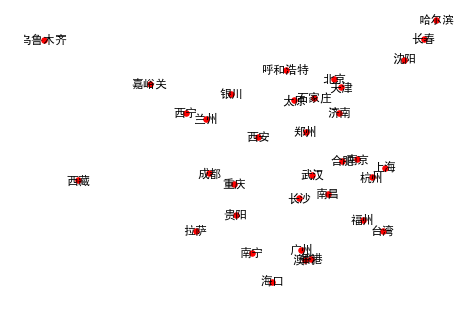

In [114]:
nx.draw(city_graph, city_location, with_labels=True, node_size=30)

In [81]:
threshold = 300
from collections import defaultdict
city_connection = defaultdict(list)

In [24]:
for c1 in city_location:
    for c2 in city_location:
        if c1 == c2: continue
        distance = get_geo_distance(c1, c2)
        if distance < threshold:
            city_connection[c1].append(c2)

In [42]:
city_connection

defaultdict(list,
            {'兰州': ['西宁', '成都', '银川'],
             '西宁': ['兰州', '成都', '拉萨'],
             '成都': ['兰州', '西宁', '拉萨', '重庆'],
             '石家庄': ['郑州', '济南', '太原', '北京'],
             '拉萨': ['西宁', '成都'],
             '贵阳': ['重庆', '南宁'],
             '武汉': ['郑州', '南昌', '长沙'],
             '郑州': ['石家庄', '武汉', '长沙', '太原'],
             '济南': ['石家庄', '合肥', '北京', '天津'],
             '南京': ['合肥', '杭州'],
             '合肥': ['济南', '南京', '南昌'],
             '杭州': ['南京', '福州', '上海'],
             '南昌': ['武汉', '合肥'],
             '福州': ['杭州', '台湾'],
             '广州': ['长沙', '香港', '澳门'],
             '长沙': ['武汉', '郑州', '广州', '香港', '澳门'],
             '海口': ['南宁'],
             '沈阳': ['长春'],
             '长春': ['沈阳', '哈尔滨'],
             '哈尔滨': ['长春'],
             '太原': ['石家庄', '郑州', '呼和浩特'],
             '台湾': ['福州'],
             '北京': ['石家庄', '济南', '天津'],
             '上海': ['杭州'],
             '重庆': ['成都', '贵阳', '银川'],
             '天津': ['济南', '北京'],
             '呼和浩特': ['太原

In [43]:
with_routes_city_graph = nx.Graph(city_connection)

In [118]:
nx.draw(with_routes_city_graph, city_location, with_labels=True, node_size=30) 

NameError: name 'with_routes_city_graph' is not defined

In [36]:
def bfs(graph, start):
    visited= [start]
    seen = set()
    while visited:
        frontier = visited.pop()
        if frontier in seen:
            continue
        for successor in graph[frontier]:
            if successor in seen:
                continue
            visited = [successor] + visited   # 广义优先搜素(用队列来进行)
            # visited = visited + successor   # 深度优先搜素(用栈来进行)
        print(frontier)
        seen.add(frontier)
    return seen

In [37]:
number_grpah = defaultdict(list)

number_grpah.update({
    1: [2, 3],
    2: [1, 4], 
    3: [1, 5],
    4: [2, 6], 
    5: [3, 7],
    7: [5, 8]
})

In [38]:
bfs(number_grpah, 1)

1
2
3
4
5
6
7
8


{1, 2, 3, 4, 5, 6, 7, 8}

In [53]:
def search(start, destination, graph, sort_candidate):
    pathes = [[start]]
    visited = set()
    while pathes:  
        print(pathes)
        path = pathes.pop(0)
        frontier = path[-1]
        if frontier in visited:
            continue
        for city in graph[frontier]:
            if city in path: continue
            new_path = path +[city]
            pathes.append(new_path)
            if city == destination:
                print(new_path)
                return new_path
        visited.add(frontier)
        pathes = sort_candidate(pathes)  # sort function for controlling serarch strategy

In [2]:
def transfer_station_first(pathes):
    return sorted(pathes, key=len)

In [3]:
def transfer_as_much_as_possible(pathes):
    return sorted(pathes, key=len, reverse=True)

In [4]:
def shortest_path_first(pathes):
    return sorted(pathes, key=get_path_distance)

In [5]:
def get_path_distance(path):
    distance = 0
    for i, station in path[:-1]:
        distance += get_geo_distance(station, path[i+1])
    return distance

In [59]:
search('北京', '香港', city_connection, sort_candidate=transfer_as_much_as_possible)

[['北京']]
[['北京', '石家庄'], ['北京', '济南'], ['北京', '天津']]
[['北京', '石家庄', '郑州'], ['北京', '石家庄', '济南'], ['北京', '石家庄', '太原'], ['北京', '济南'], ['北京', '天津']]
[['北京', '石家庄', '郑州', '武汉'], ['北京', '石家庄', '郑州', '长沙'], ['北京', '石家庄', '郑州', '太原'], ['北京', '石家庄', '济南'], ['北京', '石家庄', '太原'], ['北京', '济南'], ['北京', '天津']]
[['北京', '石家庄', '郑州', '武汉', '南昌'], ['北京', '石家庄', '郑州', '武汉', '长沙'], ['北京', '石家庄', '郑州', '长沙'], ['北京', '石家庄', '郑州', '太原'], ['北京', '石家庄', '济南'], ['北京', '石家庄', '太原'], ['北京', '济南'], ['北京', '天津']]
[['北京', '石家庄', '郑州', '武汉', '南昌', '合肥'], ['北京', '石家庄', '郑州', '武汉', '长沙'], ['北京', '石家庄', '郑州', '长沙'], ['北京', '石家庄', '郑州', '太原'], ['北京', '石家庄', '济南'], ['北京', '石家庄', '太原'], ['北京', '济南'], ['北京', '天津']]
[['北京', '石家庄', '郑州', '武汉', '南昌', '合肥', '济南'], ['北京', '石家庄', '郑州', '武汉', '南昌', '合肥', '南京'], ['北京', '石家庄', '郑州', '武汉', '长沙'], ['北京', '石家庄', '郑州', '长沙'], ['北京', '石家庄', '郑州', '太原'], ['北京', '石家庄', '济南'], ['北京', '石家庄', '太原'], ['北京', '济南'], ['北京', '天津']]
[['北京', '石家庄', '郑州', '武汉', '南昌', '合肥', '济南', '天津'], ['北京', '石家庄', '

['北京', '石家庄', '郑州', '武汉', '长沙', '香港']

In [3]:
import requests

In [61]:
G2 = nx.Graph() 

In [62]:
G2.add_node(1)

In [63]:
G2.add_nodes_from([2,3])

In [66]:
G2.add_edge(1,2)

In [68]:
G2.add_edges_from([(1,2),(2,3)])

In [70]:
G2.add_nodes_from("spam")

In [71]:
G2.add_node("spam")

In [73]:
print("节点的个数为", G2.number_of_nodes())

节点的个数为 8


In [74]:
print("边的个数为", G2.number_of_edges())

边的个数为 2


In [75]:
print("图中有这些节点", G2.nodes())

图中有这些节点 [1, 2, 3, 's', 'p', 'a', 'm', 'spam']


In [76]:
print("图中有这些边", G2.edges())

图中有这些边 [(1, 2), (2, 3)]


In [81]:
print("节点1的邻居节点是", list(G2.neighbors(1)))

节点1的邻居节点是 [2]


In [4]:
import requests

In [9]:
url = 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485'

In [10]:
headers = {"User-Agent" : "User-Agent:Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0;"}

In [11]:
response = requests.get(url, headers=headers, allow_redirects=False)

In [12]:
response.apparent_encoding

'utf-8'

In [13]:
response.encoding="utf-8"

In [14]:
html = response.text

In [2]:
from bs4 import BeautifulSoup

C:\Users\WDMWDL\Anaconda3\lib\site-packages\bs4\element.py:16: UserWarning: The soupsieve package is not installed. CSS selectors cannot be used.
  'The soupsieve package is not installed. CSS selectors cannot be used.'


In [16]:
soup = BeautifulSoup(html)

In [113]:
print(response.apparent_encoding)

ascii


In [148]:
print(soup.find_next_siblings('caption'))

[]


In [17]:
caption = soup.find('caption')

In [18]:
contents = caption.next_sibling.find_all('a')

In [19]:
contents

[<a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF" target="_blank">北京地铁1号线</a>,
 <a href="/item/%E5%A4%8D%E5%85%AB%E7%BA%BF" target="_blank">复八线</a>,
 <a href="/item/%E5%A4%8D%E5%85%AB%E7%BA%BF" target="_blank">复八线</a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF" target="_blank">北京地铁1号线</a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF" target="_blank">北京地铁13号线</a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF" target="_blank">北京地铁13号线</a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E5%85%AB%E9%80%9A%E7%BA%BF" target="_blank">北京地铁八通线</a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF" target="_blank">北京地铁5号线</a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%818%E5%8F%B7%E7%BA%BF" target="_blank">北京地铁8号线</a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8110%E5%8F%B7%E7%BA%BF" target="_blank">北京地铁10号线</a>,
 <a href="/item/%E5%8C%97%E4%B

In [20]:
temp = [''.join(pattern.findall(str(content))) for content in contents]

import re

In [21]:
pattern = re.compile(r'href=\"(.*)\" ')
common_link = "https://baike.baidu.com"

In [22]:
router_links = sorted(list(set(temp)))

In [66]:
train_staion_location = []

temp

In [78]:
for router_link in router_links:
    respond_link = requests.get(common_link + router_link, headers=headers, allow_redirects=False)
    respond_link.encoding="utf-8"
    soup1 = BeautifulSoup(respond_link.text)
    for a in soup1.find_all("caption"):
        if re.findall("车站列表", a.text):
            find_station_list = a
            break
        elif re.findall("车站信息", a.text):
            find_station_list = a
    # if len(soup1.find_all("caption", string=re.compile("车站列表"))) == 1:
    #     find_station_list = soup1.find_all("caption", string=re.compile("车站列表"))[0]

    # elif len(soup1.find_all("caption", string=re.compile("车站信息"))) == 1:
    #     find_station_list = soup1.find_all("caption", string=re.compile("车站信息"))[0]

    next_siblings = find_station_list.next_sibling.find_all("a")
    station_lists = [''.join(pattern1.findall(str(next_sibling.text))) for next_sibling in next_siblings]
    station_lists = [str(station_list) for station_list in station_lists if station_list != '']
    train_station[find_station_list.text] = station_lists
    train_staion_location += station_lists

['宋家庄站', '肖村站', '岛式站', '小红门站', '岛式站', '旧宫站', '侧式站', '亦庄桥站', '亦庄文化园站', '万源街站', '荣京东街站', '荣昌东街站', '同济南路站', '经海路站', '次渠南站', '岛式站', '次渠站', '亦庄火车站']
['宋家庄站', '肖村站', '岛式站', '小红门站', '岛式站', '旧宫站', '侧式站', '亦庄桥站', '亦庄文化园站', '万源街站', '荣京东街站', '荣昌东街站', '同济南路站', '经海路站', '次渠南站', '岛式站', '次渠站', '亦庄火车站']
['四惠站', '四惠东站', '高碑店站', '传媒大学站', '双桥站', '管庄站', '八里桥站', '通州北苑站', '果园站', '九棵树站', '梨园站', '临河里站', '土桥站', '环球影城站']
['天宫院站', '生物医药基地站', '义和庄站', '黄村火车站', '黄村西大街站', '清源路站', '枣园站', '高米店南站', '高米店北站', '西红门站', '新宫站', '公益西桥站', '角门西站', '马家堡站', '北京南站', '陶然亭站', '菜市口站', '宣武门站', '西单站', '灵境胡同站', '西四站', '平安里站', '新街口站', '西直门站', '动物园站', '国家图书馆站', '魏公村站', '人民大学站', '海淀黄庄站', '中关村站', '北京大学东门站', '圆明园站', '西苑站', '北宫门站', '安河桥北站']
['阎村东站', '苏庄站', '良乡南关站', '良乡大学城西站', '良乡大学城站', '良乡大学城北站', '广阳城站', '篱笆房站', '长阳站', '稻田站', '大葆台站', '郭公庄站', '首经贸站', '丰益桥南站']
['西土城站', '出站', '出站', '西二旗站', '生命科学园站', '朱辛庄站', '巩华城站', '沙河站', '沙河高教园站', '南邵站', '北邵洼站', '昌平东关站', '昌平站', '昌平北站', '十三陵景区站', '昌平西山口站']
['东直门站', '三元桥站', '3号航站楼站', '2号航站楼站']
['东直门站', '三元桥站', '3号

In [161]:
common_link + router_links[0]

'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E4%BA%A6%E5%BA%84%E7%BA%BF'

In [162]:
respond_link.encoding="utf-8"

['/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%816%E5%8F%B7%E7%BA%BF/10680588',
 '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%88%BF%E5%B1%B1%E7%BA%BF',
 '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%818%E5%8F%B7%E7%BA%BF/897830',
 '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8110%E5%8F%B7%E7%BA%BF',
 '/item/%E5%A4%8D%E5%85%AB%E7%BA%BF',
 '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81S1%E7%BA%BF',
 '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E4%BA%A6%E5%BA%84%E7%BA%BF',
 '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%816%E5%8F%B7%E7%BA%BF',
 '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%819%E5%8F%B7%E7%BA%BF',
 '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF',
 '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E7%87%95%E6%88%BF%E7%BA%BF',
 '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF',
 '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E5%A4%A7%E5%85%B4%E7%BA%BF',
 '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E8%A5%BF%E9%83%8A%E7%BA%BF',
 '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%98%8C%E

In [163]:
respond_link.text

'<!DOCTYPE html>\n<!--STATUS OK-->\n<html>\n\n\n\n<head>\n<meta charset="UTF-8">\n<meta http-equiv="X-UA-Compatible" content="IE=Edge" />\n<meta name="referrer" content="always" />\n<meta name="description" content="北京地铁亦庄线（以下简称“亦庄线”），是北京地铁的一条郊区线路，连接北京市区与北京经济技术开发区，由北京市地铁运营有限公司一分公司负责运营。该线于2010年12月30日除亦庄火车站之外全线开通。截至2018年12月29日，该线运营区段为宋家庄站至次渠站，途经丰台区、朝阳区、大兴区和通州区，运营里程23.3千米，共开放13座车站（其中换乘站1座），拥有车辆基地2座（宋家庄停车场和台湖车辆段）。2018年12月30日，暂缓开通整整8年的亦庄火车站与地铁8号线南段，6号线西延段，6号线北运河东站和7号线垈头站同时开通。至此，亦庄线全线通车。...">\n<title>北京地铁亦庄线_百度百科</title>\n<link rel="shortcut icon" href="/favicon.ico" type="image/x-icon" />\n<link rel="icon" sizes="any" mask href="//www.baidu.com/img/baidu.svg">\n\n<meta name="keywords" content="北京地铁亦庄线 亦庄地铁线 北京亦庄线地铁 北京亦庄线 亦庄地铁 亦庄线 北京地铁亦庄 北京地铁亦庄线历史沿革 北京地铁亦庄线运营信息 北京地铁亦庄线硬件设施 北京地铁亦庄线线路标识 北京地铁亦庄线管理机构 北京地铁亦庄线票价规定 北京地铁亦庄线建设意义">\n<meta name="image" content="https://bkssl.bdimg.com/cms/static/baike.png">\n<script type="text/javascript">\r\n  // 配置 PD 监控。\r\n  window.alogObjectConfig = {\r\n    produ

In [64]:
train_station = defaultdict(list)

In [141]:
soup1 = BeautifulSoup(respond_link.text)

In [204]:
staion_list = []
find_station_list = []
if len(soup1.find_all("caption", string=re.compile("车站列表"))) == 1:
    find_station_list = soup1.find_all("caption", string=re.compile("车站列表"))[0]
    
elif len(soup1.find_all("caption", string=re.compile("车站信息"))) == 1:
    find_station_list = soup1.find_all("caption", string=re.compile("车站信息"))[0]


next_siblings = find_station_list.next_sibling.find_all("a")

In [24]:
pattern1 = re.compile(r'\w+站')

In [222]:
station_lists = [''.join(pattern1.findall(str(next_sibling.text))) for next_sibling in next_siblings]

In [223]:
station_lists = [station_list for station_list in station_lists if station_list != '']

In [132]:
type(train_staion_location[20])

str

In [225]:
find_station_list

<caption>北京地铁6号线车站列表</caption>

In [226]:
train_station[find_station_list] = station_lists

In [65]:
train_station

defaultdict(list, {})

In [231]:
len(router_links)

25

In [40]:
for a in soup1.find_all("caption"):
    print(re.findall(r"车站列表", a.text))

[]
['车站列表']
[]
[]
[]


In [1]:
with_routes_train_station = nx.Graph(train_station)
train_graph = nx.Graph()
train_graph.add_nodes_from(train_staion_location)


nx.draw(train_graph, pos, with_labels=True, node_size=30) 

NameError: name 'nx' is not defined

In [81]:
train_station

defaultdict(list,
            {'车站信息\u3000\u3000': ['宋家庄站',
              '肖村站',
              '岛式站',
              '小红门站',
              '岛式站',
              '旧宫站',
              '侧式站',
              '亦庄桥站',
              '亦庄文化园站',
              '万源街站',
              '荣京东街站',
              '荣昌东街站',
              '同济南路站',
              '经海路站',
              '次渠南站',
              '岛式站',
              '次渠站',
              '亦庄火车站'],
             '北京地铁八通线车站列表': ['四惠站',
              '四惠东站',
              '高碑店站',
              '传媒大学站',
              '双桥站',
              '管庄站',
              '八里桥站',
              '通州北苑站',
              '果园站',
              '九棵树站',
              '梨园站',
              '临河里站',
              '土桥站',
              '环球影城站'],
             '北京地铁4号线、大兴线车站列表': ['天宫院站',
              '生物医药基地站',
              '义和庄站',
              '黄村火车站',
              '黄村西大街站',
              '清源路站',
              '枣园站',
              '高米店南站',
              '高米店北站',
              '西红门站',

In [83]:
test_train_sation = defaultdict(list)
test_train_sation["车站信息"]=["宋家庄站","肖村站","小红门站","旧宫站","侧式站","亦庄桥站","亦庄文化园站","万源街站","荣京东街站","荣昌东街站","同济南路站","经海路站","次渠南站","次渠站","亦庄火车站",]





#################################北京地铁站坐标#################################





In [9]:
import requests

In [10]:
coordinate_location_url = "http://ifamily.wang/2018/06/21/2018-06-20/"
res_coordinate_location = requests.get(coordinate_location_url)

In [11]:
res_coordinate_location.apparent_encoding

'utf-8'

In [13]:
html_coordinate_location = res_coordinate_location.text
res_coordinate_location.encoding="utf-8"
soup = BeautifulSoup(html_coordinate_location, from_encoding="utf8")
print(soup.text)


  






























  
  
  












  


  


  


  





  




























  var NexT = window.NexT || {};
  var CONFIG = {
    root: '/',
    scheme: 'Mist',
    version: '5.1.3',
    sidebar: {"position":"left","display":"post","offset":12,"b2t":false,"scrollpercent":false,"onmobile":false},
    fancybox: true,
    tabs: true,
    motion: {"enable":true,"async":false,"transition":{"post_block":"fadeIn","post_header":"slideDownIn","post_body":"slideDownIn","coll_header":"slideLeftIn","sidebar":"slideUpIn"}},
    duoshuo: {
      userId: '0',
      author: '博主'
    },
    algolia: {
      applicationID: '',
      apiKey: '',
      indexName: '',
      hits: {"per_page":10},
      labels: {"input_placeholder":"Search for Posts","hits_empty":"We didn't find any results for the search: ${query}","hits_stats":"${hits} results found in ${time} ms"}
    }
  };




  





  北京最新地铁坐标（高德地图） | One Code One Team
  












  
  
    
  

  
    

    
      

In [14]:
station_coordinate_location = defaultdict(list)
station_name_pattern = re.compile(r'\w+')

In [15]:
for tr in soup.find_all('tr')[1:]:
    tds = tr.find_all("td")
    name = station_name_pattern.findall(tds[1].text)[0]
    if name[-1] == "站":
        name = name[:-1]
    station_coordinate_location[name+"站"] = (float(tds[-2].text), float(tds[-1].text))

In [16]:
station_coordinate_location['2号航站楼站'] = station_coordinate_location.get("T2航站楼站")
station_coordinate_location.pop("T2航站楼站")
station_coordinate_location['3号航站楼站'] = station_coordinate_location.get("T3航站楼站")
station_coordinate_location.pop("T3航站楼站")

(40.052544, 116.615579)

In [17]:
station_coordinate_location

defaultdict(list,
            {'苹果园站': (39.926727, 116.177388),
             '古城站': (39.90745, 116.190337),
             '八角游乐园站': (39.907442, 116.212684),
             '八宝山站': (39.90744, 116.235948),
             '玉泉路站': (39.907433, 116.252888),
             '五棵松站': (39.907456, 116.273987),
             '万寿路站': (39.907474, 116.294765),
             '公主坟站': (39.907469, 116.309919),
             '军事博物馆站': (39.907422, 116.321459),
             '木樨地站': (39.907379, 116.337583),
             '南礼士路站': (39.907234, 116.352583),
             '复兴门站': (39.907242, 116.356866),
             '西单站': (39.907383, 116.374072),
             '天安门西站': (39.907472, 116.391278),
             '天安门东站': (39.90778, 116.401216),
             '王府井站': (39.908069, 116.411571),
             '东单站': (39.908325, 116.41848),
             '建国门站': (39.908501, 116.435806),
             '永安里站': (39.908454, 116.450497),
             '国贸站': (39.909104, 116.461841),
             '大望路站': (39.908287, 116.475783),
             '四惠站

In [12]:
station_location2 = nx.Graph()
station_location2.add_nodes_from(station_coordinate_location.keys())

In [13]:
nx.draw(station_location2, station_coordinate_location, with_labels=False, node_size=30 )

In [4]:
import re
import requests
import networkx as nx
from bs4 import BeautifulSoup
from collections import defaultdict

C:\Users\WDMWDL\Anaconda3\lib\site-packages\bs4\element.py:16: UserWarning: The soupsieve package is not installed. CSS selectors cannot be used.
  'The soupsieve package is not installed. CSS selectors cannot be used.'


In [56]:
common_link = "https://baike.baidu.com"
url = 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485'
headers = {"User-Agent": "User-Agent:Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0;"}
response = requests.get(url, headers=headers, allow_redirects=False)
# response.apparent_encoding  for getting 编码方式
response.encoding = "utf-8"
html = response.text
soup = BeautifulSoup(html)
caption = soup.find('caption')
contents = caption.next_sibling.find_all('a')
pattern = re.compile(r'href=\"(.*)\" ')
temp = [''.join(pattern.findall(str(content))) for content in contents]
router_links = sorted(list(set(temp)))

train_station_T = {}
pattern1 = re.compile(r'\w+站')
for router_link in router_links:
    respond_link = requests.get(common_link + router_link, headers=headers, allow_redirects=False)
    respond_link.encoding = "utf-8"
    soup1 = BeautifulSoup(respond_link.text)
    for a in soup1.find_all("caption"):
        if re.findall("车站列表", a.text):
            find_station_list = a
            break
        elif re.findall("车站信息", a.text):
            find_station_list = a
    next_siblings = find_station_list.next_sibling.find_all("tr")
    stations = getStations(next_siblings)
    train_station_T[find_station_list.text] = stations

In [55]:
filter_station_pattern = re.compile(r'\w+')
def getStations(trs):
    res = []
    title = trs[0].find_all('th')
    if title[0].text.strip() == "车站名称":
        index = 0
    elif title[1].text.strip() == "车站名称" and len(trs[1].find_all('th')) != 0:
        index = 0
    else:
        index = 1
    for tr in trs[1:]:
        tds = tr.find_all("td")
        if len(tds) > 1:
            res += [filter_station_pattern.findall(tds[index].text)[0]]
    return res

##########################处理 station 数据##############################

In [57]:
train_station_T

{'车站信息\u3000\u3000': ['宋家庄站',
  '肖村站',
  '小红门站',
  '旧宫站',
  '亦庄桥站',
  '亦庄文化园站',
  '万源街站',
  '荣京东街站',
  '荣昌东街站',
  '同济南路站',
  '经海路站',
  '次渠南站',
  '次渠站',
  '亦庄火车站'],
 '北京地铁八通线车站列表': ['四惠站',
  '高碑店站',
  '传媒大学站',
  '双桥站',
  '管庄站',
  '八里桥站',
  '通州北苑站',
  '九棵树站',
  '梨园站',
  '施园站'],
 '北京地铁4号线、大兴线车站列表': ['天宫院站',
  '生物医药基地站',
  '义和庄站',
  '黄村火车站',
  '黄村西大街站',
  '清源路站',
  '枣园站',
  '高米店南站',
  '高米店北站',
  '西红门站',
  '新宫站',
  '公益西桥站',
  '角门西站',
  '马家堡站',
  '北京南站',
  '陶然亭站',
  '菜市口站',
  '宣武门站',
  '西单站',
  '灵境胡同站',
  '西四站',
  '平安里站',
  '新街口站',
  '西直门站',
  '动物园站',
  '国家图书馆站',
  '魏公村站',
  '人民大学站',
  '海淀黄庄站',
  '中关村站',
  '北京大学东门站',
  '圆明园站',
  '西苑站',
  '北宫门站',
  '安河桥北站'],
 '北京地铁房山线车站列表\u3000\u3000': ['阎村东站',
  '苏庄站',
  '良乡南关站',
  '良乡大学城西站',
  '良乡大学城站',
  '良乡大学城北站',
  '广阳城站',
  '篱笆房站',
  '长阳站',
  '稻田站',
  '大葆台站',
  '郭公庄站',
  '花乡桥东站',
  '西白家窑站',
  '首经贸站',
  '丰益桥南站'],
 '北京地铁昌平线车站列表': ['蓟门桥站',
  '西土城站',
  '学院桥站',
  '六道口站',
  '学清路站',
  '上清桥站',
  '清河站',
  '西二旗站',
  '生命科学园站',
  '朱辛庄站',
  '巩华城站',
  '沙河高教园站',
  '南邵

In [51]:
train_station_connection = defaultdict(list)

In [52]:

for key, values in train_station_T.items():
    for index, value in enumerate(values[:-1]):
        train_station_connection[value].append(values[index + 1])
        train_station_connection[values[index + 1]].append(value)

In [53]:
train_station_connection

defaultdict(list,
            {'宋家庄站': ['肖村站', '分钟寺站', '石榴庄站', '刘家窑站'],
             '肖村站': ['宋家庄站', '小红门站'],
             '小红门站': ['肖村站', '旧宫站'],
             '旧宫站': ['小红门站', '亦庄桥站'],
             '亦庄桥站': ['旧宫站', '亦庄文化园站'],
             '亦庄文化园站': ['亦庄桥站', '万源街站'],
             '万源街站': ['亦庄文化园站', '荣京东街站'],
             '荣京东街站': ['万源街站', '荣昌东街站'],
             '荣昌东街站': ['荣京东街站', '同济南路站'],
             '同济南路站': ['荣昌东街站', '经海路站'],
             '经海路站': ['同济南路站', '次渠南站'],
             '次渠南站': ['经海路站', '次渠站'],
             '次渠站': ['次渠南站', '亦庄火车站'],
             '亦庄火车站': ['次渠站'],
             '四惠站': ['高碑店站', '大望路站', '四惠东站'],
             '高碑店站': ['四惠站', '传媒大学站', '预计2019年12月底两线贯通', '传媒大学站'],
             '传媒大学站': ['高碑店站', '管庄站', '高碑店站', '双桥站'],
             '管庄站': ['传媒大学站', '八里桥站', '双桥站', '八里桥站'],
             '八里桥站': ['管庄站', '通州北苑站', '管庄站', '通州北苑站'],
             '通州北苑站': ['八里桥站', '九棵树站', '八里桥站', '果园站'],
             '九棵树站': ['通州北苑站', '梨园站', '果园站', '梨园站'],
             '梨园站': ['九棵树站', '施园站', 

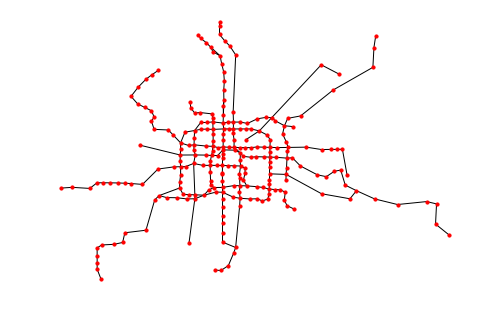

In [81]:
station_location2 = nx.Graph(station_connection)
nx.draw(station_location2, station_coordinate_locationTT, with_labels=False, node_size=10)

In [22]:
res = []
for i in train_station_T.values():
    res += i

In [23]:
resT = list(set(res))
length = len(values) - 1
    for index, value in enumerate(values[:-1]):
        if station_coordinate_locationTT.get(value) != None and station_coordinate_locationTT.get(values[index + 1]) != None:
            station_connection[value].append(values[index + 1])
            print(values[index + 1])
            print(value)
            station_connection[values[index + 1]].append(value)
        elif not station_coordinate_locationTT.get(value) != None:
            continue
        else:
            print("test3")
            while index < length and not station_coordinate_locationTT.get(values[index + 1]) != None:
                index += 1
            station_connection[value].append(values[index])
            station_connection[values[index + 1]].append(value)

In [40]:
station_coordinate_locationTT.get("宋家庄站")

(39.845849, 116.428368)

In [58]:
train_station_T["北京地铁八通线车站列表"]

['四惠站', '高碑店站', '传媒大学站', '双桥站', '管庄站', '八里桥站', '通州北苑站', '九棵树站', '梨园站', '施园站']

In [26]:
final_list = []
station_coordinate_location = {}

for resTT in resT:
    lan = station_coordinate_location.get(resTT)
    if lan != None:
        final_list += [resTT]
        final_dict[resTT] = lan

In [72]:
# train_station_T
station_coordinate_locationTT = {}
station_connection = defaultdict(list)

for key, value in station_coordinate_location.items():
    if value != []:
        station_coordinate_locationTT[key] = value
        
for key, values in train_station_T.items():
    for value in values:
        if station_coordinate_locationTT.get(value) == None:
            print(value)
            train_station_T[key].remove(value)
      

In [73]:
for key, values in train_station_T.items():
    for index, value in enumerate(values[:-1]):
        station_connection[value].append(values[index + 1])
        station_connection[values[index + 1]].append(value)
            

In [82]:
train_station_T

{'车站信息\u3000\u3000': ['宋家庄站',
  '肖村站',
  '小红门站',
  '旧宫站',
  '亦庄桥站',
  '亦庄文化园站',
  '万源街站',
  '荣京东街站',
  '荣昌东街站',
  '同济南路站',
  '经海路站',
  '次渠南站',
  '次渠站',
  '亦庄火车站'],
 '北京地铁八通线车站列表': ['四惠站',
  '高碑店站',
  '传媒大学站',
  '双桥站',
  '管庄站',
  '八里桥站',
  '通州北苑站',
  '九棵树站',
  '梨园站'],
 '北京地铁4号线、大兴线车站列表': ['天宫院站',
  '生物医药基地站',
  '义和庄站',
  '黄村火车站',
  '黄村西大街站',
  '清源路站',
  '枣园站',
  '高米店南站',
  '高米店北站',
  '西红门站',
  '新宫站',
  '公益西桥站',
  '角门西站',
  '马家堡站',
  '北京南站',
  '陶然亭站',
  '菜市口站',
  '宣武门站',
  '西单站',
  '灵境胡同站',
  '西四站',
  '平安里站',
  '新街口站',
  '西直门站',
  '动物园站',
  '国家图书馆站',
  '魏公村站',
  '人民大学站',
  '海淀黄庄站',
  '中关村站',
  '北京大学东门站',
  '圆明园站',
  '西苑站',
  '北宫门站',
  '安河桥北站'],
 '北京地铁房山线车站列表\u3000\u3000': ['阎村东站',
  '苏庄站',
  '良乡南关站',
  '良乡大学城西站',
  '良乡大学城站',
  '良乡大学城北站',
  '广阳城站',
  '篱笆房站',
  '长阳站',
  '稻田站',
  '大葆台站',
  '郭公庄站',
  '首经贸站'],
 '北京地铁昌平线车站列表': ['西土城站',
  '六道口站',
  '西二旗站',
  '生命科学园站',
  '朱辛庄站',
  '巩华城站',
  '沙河高教园站',
  '南邵站',
  '北邵洼站',
  '昌平站',
  '十三陵景区站'],
 '北京地铁机场线车站信息': ['东直门站', '三元桥站', '3号航站楼站', '2号航站楼站'],
 